# **Lab 4**

- Eileen Garcia: 48241821
- Trevor  Dohm: 48376059
- Reece Iriye: 48255107

## **0: Imports** 

In [54]:
import warnings
import sys

from typing import Tuple

import numpy as np
from scipy.special import expit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [55]:
# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Pandas: 2.0.3
Numpy: 1.24.3


## **1: Load, Split, Balance**

### **1.1: Loading Data In and Seeing Basic Characteristcs**

Here, we loead the ACS census data into a Pandas DataFrame and display some of its key characteristics.

In [56]:
df_original_csv: pd.DataFrame = pd.read_csv("Dataset/acs2017_census_tract_data.csv")
df_original_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [57]:
df_original_csv.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [58]:
# Dataset Size
row_count, col_count = df_original_csv.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 74001 rows and 37 columns.


### **1.2: Remove Observations That Have Missing Data**

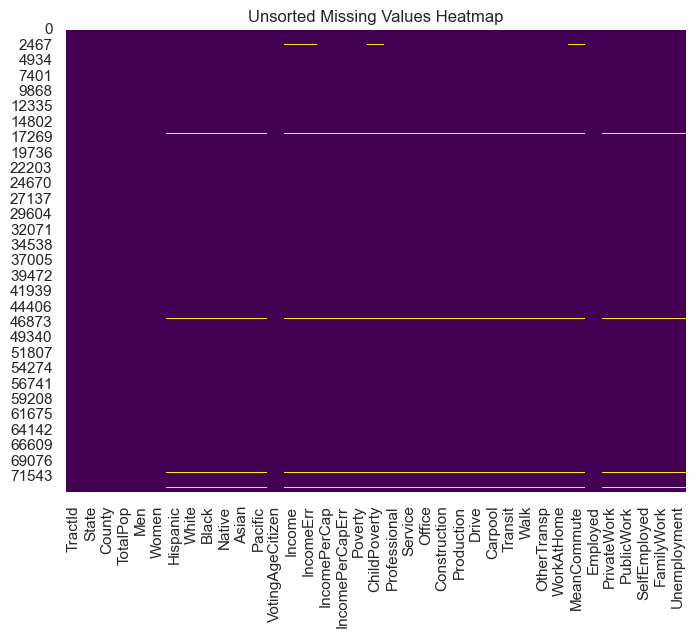

In [59]:
# Exploring Missing Data - ChatGPT 
# Create a boolean DataFrame where True indicates missing values

missing_values = df_original_csv.isnull()

plt.figure(figsize=(8,6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Unsorted Missing Values Heatmap')
plt.show()

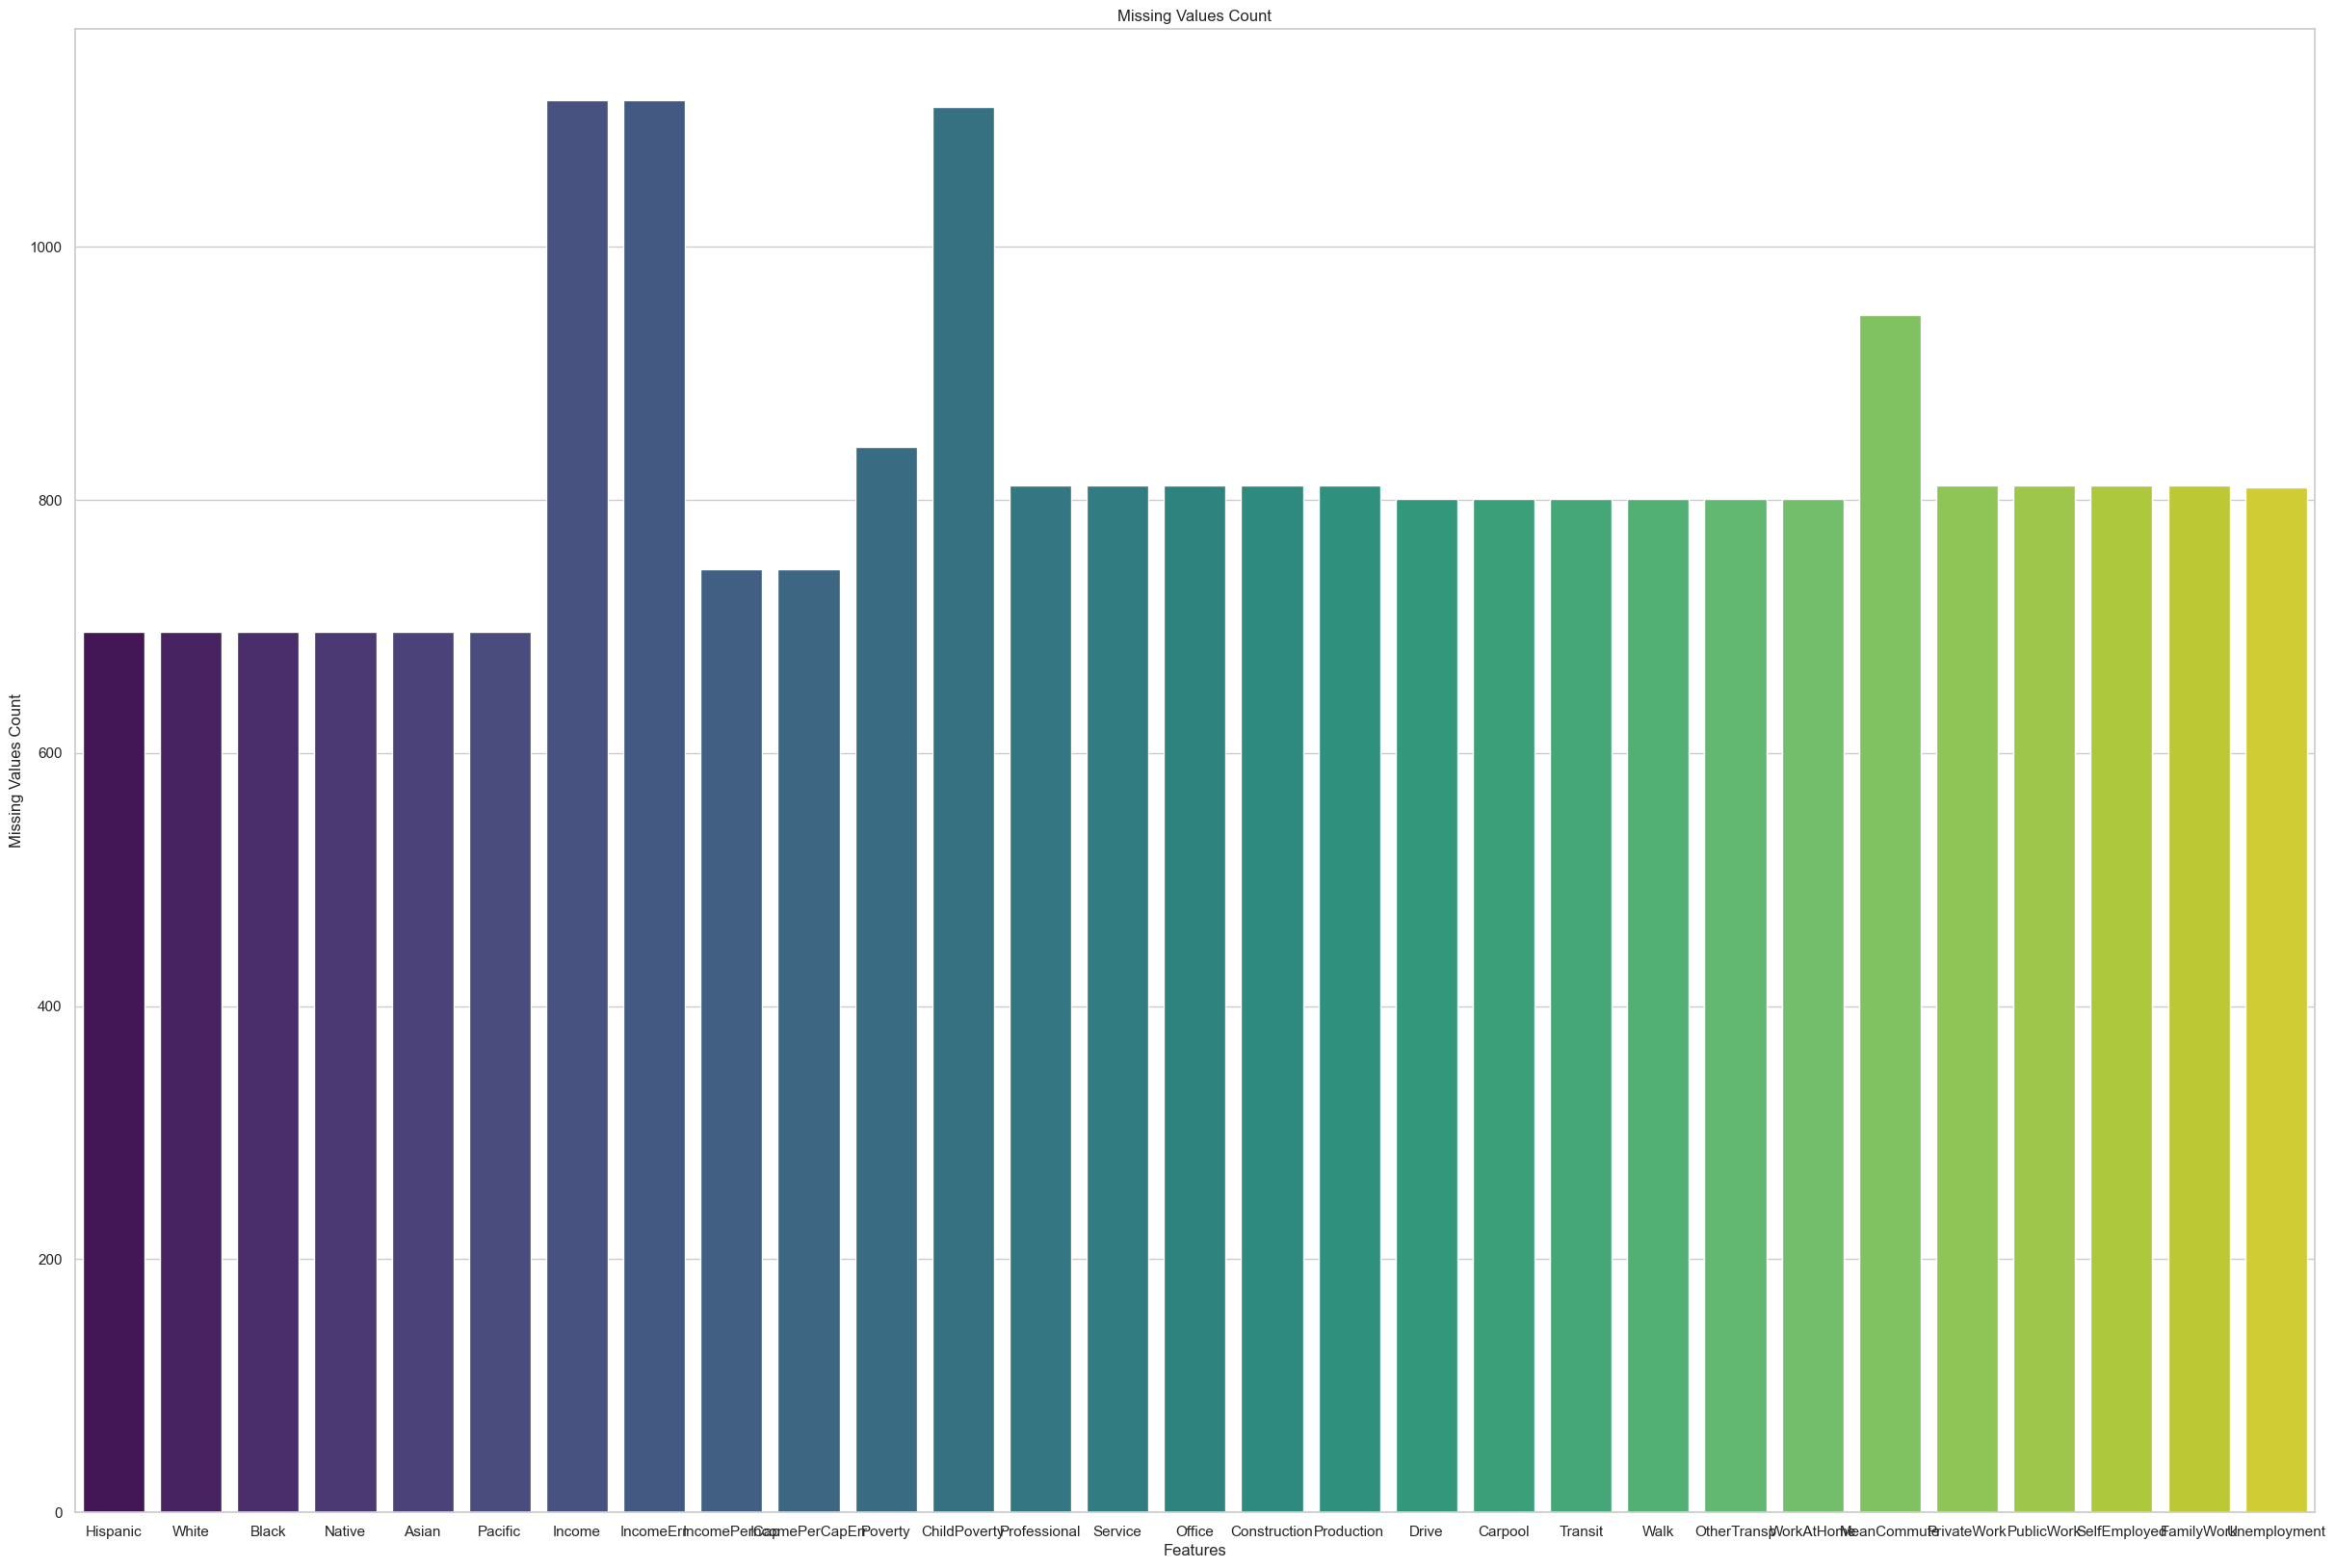

In [60]:
# Bar Plot of missing Values

# Find Missing Values (Sort)
missCount = df_original_csv.isnull().sum()[df_original_csv.isnull().sum() > 0]
sns.set(style = "whitegrid")
plt.figure(figsize=(30, 20))
sns.barplot(x = missCount.index, y = missCount.values, palette = "viridis")
plt.title('Missing Values Count')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

In [61]:
# Remove observations with missing data
df_modified = df_original_csv.dropna(inplace=False)

# Dataset Size - reduced by 1283 instances
row_count, col_count = df_modified.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 72718 rows and 37 columns.


### **1.3: Encode any string data as integers**

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over the columns and encode those with string data
for column in df_modified.columns:
    if df_modified[column].dtype == 'object':
        df_modified[column] = label_encoder.fit_transform(df_modified[column])

df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  int64  
 2   County            72718 non-null  int64  
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

### **1.4: Keep/Remove the "County" variable**
Explain why you decided to keep or remove the variable.

In [63]:
# Delete "county" variable
df_modified.drop('County', axis=1, inplace=True)

### **1.5: Balance the Dataset**
Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.

Several ways to balance an imbalanced dataset. One option is to use oversampling or undersampling. In this case, we can balance the dataset by choosing quantization thresholds for the "ChildPoverty" variable. 

We can then divide the data into four classes with equal numbers of instances based on the thresholds.

In [64]:
# Balance the dataset using quantization thresholds
df_modified['ChildPoverty'] = pd.qcut(df_modified['ChildPoverty'], q=4, labels=False)
df_modified['ChildPoverty'].unique()

array([2, 3, 0, 1])

(TREVOR + REECE: Will balancing the dataset before splitting it into train/test lead to unrealistic evaluation metrics because it doesn't represent the real distribute???)

### **1.6: Training and Testing Split**
Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.

In [65]:
from sklearn.model_selection import train_test_split

X = df_modified.drop('ChildPoverty', axis=1)  # Exclude the quantized target variable
y = df_modified['ChildPoverty']  # Use the quantized target variable as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **2: Pre-processing and Initial Modeling**

### **2.1: Code for 2-Layer Multi-Layer Perceptron (MLP)**

You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.

In [66]:
# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(
        self, 
        n_hidden=30,
        C=0.0, 
        epochs=500, 
        eta=0.001, 
        random_state=None,
    ):
        np.random.seed(random_state)
        
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T    
        return onehot

    # MODIFIED FROM ORIGINAL DR. LARSON IMPLEMENTATION
    def _initialize_weights(self) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Initialize weights using the Glorot initialization method from Uniform Dist.
        This method provides an initial weight value depending on the number of units in the previous 
        and the next layer, enhancing convergence during training.

        Mathematical representation can be seen below in a Jupyter Notebook markdown
        cell in LaTeX.
        """
        uniform_bound_W1: float = np.sqrt(6.0 / (self.n_features_ + self.n_hidden))
        W1 = np.random.uniform(-uniform_bound_W1, uniform_bound_W1, (self.n_hidden, self.n_features_))
        b1 = np.zeros((self.n_hidden, 1))

        uniform_bound_W2: float = np.sqrt(6.0 / (self.n_hidden + self.n_output_))
        W2 = np.random.uniform(-uniform_bound_W2, uniform_bound_W2, (self.n_output_, self.n_hidden))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2
    
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    

    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2))
    

    # MODIFIED FROM ORIGINAL DR. LARSON IMPLEMENTATION
    def _cost(self, A3: np.array, Y_enc: np.array, W1: np.array, W2: np.array) -> float:
        """
        Compute the objective function value using cross-entropy

        The objective function is calculated using the cross-entropy loss,
        which is appropriate for binary and multi-class classification tasks
        An L2 regularization term is added to the cross-entropy cost

        Parameters
        ----------
        A3: np.array
            Activations of the output layer, for each instance in the dataset
        Y_enc: np.array
            One-hot encoded true labels corresponding to each instance in the dataset
        W1: np.array
            Weights of the first layer
        W2: np.array
            Weights of the second layer

        Returns
        -------
        float
            Total cost computed as the sum of the cross-entropy cost and the L2 regularization term

        Note
        ----
        Mathematical representation can be seen below in a Jupyter Notebook markdown cell in LaTeX.
        """
        cost: float = np.mean( (-Y_enc * np.log(A3)) - ((1 - Y_enc) * np.log(1 - A3)) )
        L2_term: float = self._L2_reg(self.l2_C, W1, W2)

        return cost + L2_term

Glorot initialization from a Uniform Distribution that the `_initialize_weights()` function follows is in this format:

$$
w_{ij}^{(L)} \sim U\left[\pm 4 \sqrt{\frac{6}{n^{(L)} + n^{(L+1)}}}\right]
$$

Calculating cost in the `_cost()` function using cross-entropy loss, we use the following formulas for cross-entropy loss: 

$$
-\frac{1}{m}\sum_{i=1}^{m}(y_i \log(a_i) + (1-y_i)\log(1 - a_i)) \\
$$

In [89]:
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code below!
        pass
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        # X_data, y_data = X.copy(), y.copy()
        Y_enc: np.ndarray
        X_data, Y_enc = X.copy(), y.copy()
        # Y_enc = self._encode_labels(y)
        Y_enc = Y_enc.reshape(-1, 1)
        
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2, self.b1, self.b2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            

        return self

In [68]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # MODIFIED FROM ORIGINAL DR. LARSON IMPLEMENTATION
    def _get_gradient(
        self, 
        A1: np.ndarray, A2: np.ndarray, A3: np.ndarray, 
        Z1: np.ndarray, Z2: np.ndarray, 
        Y_enc: np.ndarray, 
        W1: np.ndarray, W2: np.ndarray,
    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Compute gradient step using backpropagation for cross-entropy loss and sigmoid activation
        
        Parameters
        ----------
        A1: np.ndarray
            Activations from input layer
        A2: np.ndarray
            Activations from first hidden layer
        A3: np.ndarray
            Activations from output layer (after sigmoid)
        Z1: np.ndarray
            Weighted sum for first hidden layer (before activation)
        Z2: np.ndarray
            Weighted sum for output layer (before activation)
        Y_enc: np.ndarray
            One-hot encoded labels
        W1: np.ndarray
            Weights from input layer to first hidden layer
        W2: np.ndarray
            Weights from first hidden layer to output layer
        
        Returns
        -------
        gradW1: np.ndarray
            Gradient of the loss with respect to W1
        gradW2: np.ndarray
            Gradient of the loss with respect to W2
        gradb1: np.ndarray
            Gradient of the loss with respect to biases of first hidden layer
        gradb2: np.ndarray
            Gradient of the loss with respect to biases of output layer
        """
        
        # Compute gradient for output layer (difference between prediction and actual)
        V2 = A3 - Y_enc
        
        # Backpropagate error through the hidden layer
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        
        # Calculate gradient for weights
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        # Calculate gradient for biases
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # Add regularization term to the gradient (ignoring the bias term)
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2 

        return gradW1, gradW2, gradb1, gradb2


In [94]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # but keep other keywords
        super().__init__(**kwds)
        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
        
    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        # Y_enc = self._encode_labels(y)
        Y_enc = y_data.reshape(-1, 1)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        
        # outer loop: go through all data one time (epochs)
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                # shuffle the data so batches ar different
                ridx = np.random.permutation(y_data.shape[0])
                # X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]
                X_data = X_data[ridx]


            # use numpy split to split into equal sized batches 
            # num batches == self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            # inner loop: go through all mini-batches of data
            for idx in mini: # iterate through each batch
                # feedforward
                A1, Z1, A2, Z2, A3 = (
                    self._feedforward(
                        X_data[idx],
                        self.W1, self.W2,
                        self.b1, self.b2,
                    )
                )
                
                # cost = self._cost(A3,Y_enc[:, idx],self.W1, self.W2)
                cost = self._cost(A3,Y_enc,self.W1, self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = (
                    self._get_gradient(
                        A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                        # Y_enc=Y_enc[:, idx],
                        Y_enc=Y_enc,
                        W1=self.W1, W2=self.W2,
                    )
                )

                # now use simple momentum to update values
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2 
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                self.b1 -= eta * gradb1 
                self.b2 -= eta * gradb2 

            self.cost_.append(mini_cost)
            
        return self

In [95]:
from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin_l_bfgs_b

class TLPVectorizedBFGS(TwoLayerPerceptronVectorized): 
    def __init__(self, gtol=1e-5, **kwargs):        
        # need to add to the original initializer 
        self.gtol = gtol
        
        # but keep other keywords
        super().__init__(**kwargs)
        

    @staticmethod
    def _pack(in1, in2, in3, in4):
        '''Pack and flatten input vectors '''
        return np.hstack((in1.flatten(),in2.flatten(),in3.flatten(),in4.flatten()))
    

    def _unpack(self, in_tot):
        '''Undo packing according to layer weight sizes'''
        start = 0
        end = self.W1.size
        out1 = in_tot[start:end].reshape(self.W1.shape)
        start = end
        end += self.W2.size
        out2 = in_tot[start:end].reshape(self.W2.shape)
        start = end
        end += self.b1.size
        out3 = in_tot[start:end].reshape(self.b1.shape)
        start = end
        end += self.b2.size
        out4 = in_tot[start:end].reshape(self.b2.shape)
        return out1, out2, out3, out4
    
    
    # MODIFIED FROM ORIGINAL DR. LARSON IMPLEMENTATION
    def _calc_cost_gradient_packed(
        self, 
        W: np.ndarray, 
        X_data: np.ndarray, 
        Y_enc: np.ndarray,
    ) -> Tuple[float, np.ndarray]:
        """
        Compute the cross-entropy cost and its gradient with respect to weights for the BFGS optimizer
        
        Parameters
        ----------
        W: np.ndarray
            Packed and flattened weights and biases of both layers
        X_data: np.ndarray
            Input data
        Y_enc: np.ndarray
            One-hot encoded labels
        
        Returns
        -------
        cost: float
            Cross-entropy cost
        gradients: np.ndarray
            Packed gradients with respect to weights and biases
        """
        
        W1, W2, b1, b2 = self._unpack(W) 
        A1, Z1, A2, Z2, A3 = self._feedforward(X_data, W1, W2, b1, b2)
        
        # Cross-entropy loss calculation
        cost: float = -np.sum( (Y_enc * np.log(A3)) + ((1 - Y_enc) * np.log(1 - A3)) )
        
        L2_term: float = self._L2_reg(self.l2_C, W1, W2)
        
        gradW1, gradW2, gradb1, gradb2 = (
            self._get_gradient(
                A1=A1, 
                A2=A2, 
                A3=A3,
                Z1=Z1, 
                Z2=Z2,
                Y_enc=Y_enc,
                W1=W1, 
                W2=W2,
            )
        )

        # RETURN THE TUPLE CONTAINING BOTH COST AND PACKED GRADIENTS
        return (
            # Cost from cross-entropy loss calculation plus the L2 term
            cost + L2_term, 

            # Packed gradients with respect to weights and biases from _pack function
            self._pack(gradW1, gradW2, gradb1, gradb2),
        )

    # MODIFIED FROM ORIGINAL DR. LARSON IMPLEMENTATION
    def _cost_packed(self, W: np.ndarray, X_data: np.ndarray, Y_enc: np.ndarray) -> float:
        """
        Compute the cross-entropy cost given packed weights for the BFGS optimizer.
        
        Parameters
        ----------
        W: np.ndarray
            Packed and flattened weights and biases of both layers
        X_data: np.ndarray
            Input data
        Y_enc: np.ndarray
            One-hot encoded labels
        
        Returns
        -------
        cost: float
            Cross-entropy cost
        """
        
        W1, W2, b1, b2 = self._unpack(W)
        _, _, _, _, A3 = self._feedforward(X_data, W1, W2, b1, b2)
        
        # Cross-entropy loss calculation
        return -np.sum(Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3))

    
    def fit(self, X, y, print_progress=0):
        '''Learn weights from training data'''
        X_data, y_data = X.copy(), y.copy()
        # Y_enc = self._encode_labels(y)
        Y_enc = y_data.reshape(-1, 1)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        # make initial matrices into single row vector
        W = self._pack(self.W1,self.W2, self.b1, self.b2)
        
        if print_progress>0:
            def callback(xd):
                callback.counter += 1
                if callback.counter%print_progress==0:
                    sys.stderr.write('\rEpoch: %d/%d (max)' % (callback.counter,callback.epochs))
                    sys.stderr.flush()

            callback.counter = 0
            callback.epochs = self.epochs
            
        else:
            callback = None
            
        # compute gradient optimum with bfgs
        W_best, _, props = (
            fmin_l_bfgs_b(
                x0=W,
                func=self._calc_cost_gradient_packed,
                maxfun=self.epochs,
                callback=callback,
                pgtol=self.gtol,
                args=(X_data, Y_enc),
            )
        )
        
        self.W1, self.W2, self.b1, self.b2 = self._unpack(W_best)
        if print_progress:
            print(props)

### **2.2: Train and Evaluate Model without Normalizing or One-Hot-Encoding Data**

In [103]:
%%time

from sklearn.metrics import accuracy_score

params = {
    "n_hidden": 50,
    "C": 0.1, # tradeoff L2 regularizer
    "epochs": 100, # iterations
    "eta": 0.1,  # learning rate
    # "alpha": 0.1, # momentum calculation
    # "decrease_const": 0.01, # decreasing eta
    # "minibatches": len(X_train)/64, # minibatch size
    # "shuffle": True,
    "random_state": 123,
    "gtol": 1e-5,
}

model_raw_2_layer = TLPVectorizedBFGS(**params)
model_raw_2_layer.fit(X_train.to_numpy(), y_train.to_numpy(), print_progress=50)
yhat = model_raw_2_layer.predict(X_test)
print('Accuracy:', accuracy_score(y_test,yhat))

: 

### **2.3: Train and Evaluate Model without Normalizing or One-Hot-Encoding Data**

In [79]:
y_test.unique()

array([2, 3, 0, 1])

In [ ]:
X_train